<a href="https://colab.research.google.com/github/dsanmartin/ELE050-B/blob/main/04_knn_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt

In [11]:
cancer_data = load_breast_cancer(as_frame=True)

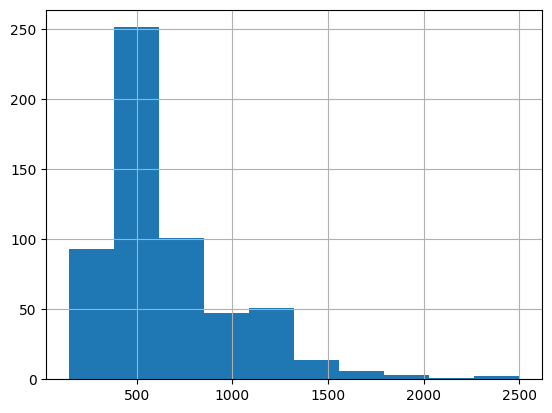

In [12]:
cancer_data.data['mean area'].hist()
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## k-NN

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier = knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

In [27]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## SVM

In [29]:
svm_classifier = SVC(kernel='linear')
svm_classifier = svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

In [30]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Regresión

In [32]:
diabetes = load_diabetes(as_frame=True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [34]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor = knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)

In [35]:
print("MSE=%.4f, R2=%.4f" % (mean_squared_error(y_test, y_pred_knn), r2_score(y_test, y_pred_knn)))

MSE=3019.0755, R2=0.4302


In [36]:
smv_regressor = SVR(kernel='linear')
smv_regressor = smv_regressor.fit(X_train, y_train)
y_pred_smv = smv_regressor.predict(X_test)

In [37]:
print("MSE=%.4f, R2=%.4f" % (mean_squared_error(y_test, y_pred_smv), r2_score(y_test, y_pred_smv)))

MSE=5190.3877, R2=0.0203


## Visualización

In [43]:
cancer_data.data.shape

(569, 30)

<Figure size 2000x1200 with 0 Axes>

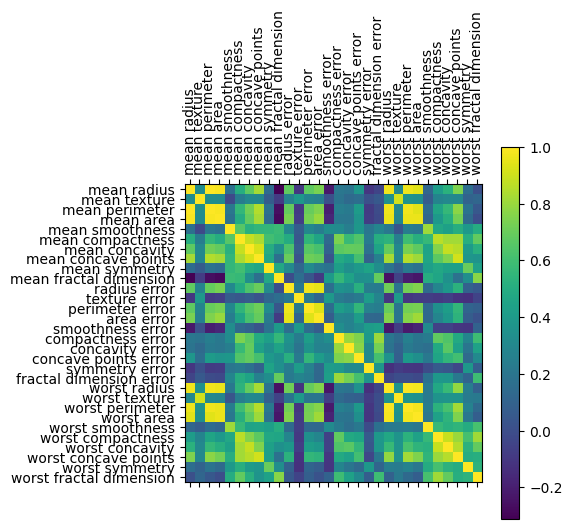

In [55]:
# Correlation matrix with plot with matplotlib
corr_matrix = cancer_data.data.corr()
plt.figure(figsize=(20, 12))
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()


In [47]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(cancer_data.data)
X_pca = pca.transform(cancer_data.data)

In [44]:
X_pca.shape

(569, 2)

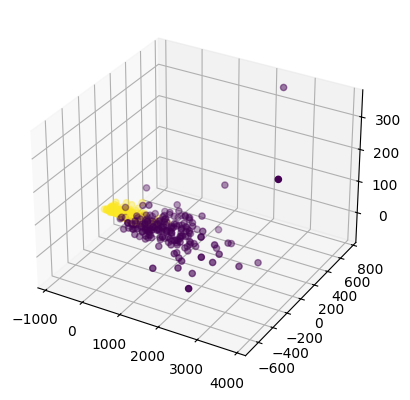

In [48]:
# 3D scatter
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cancer_data.target)
plt.show()

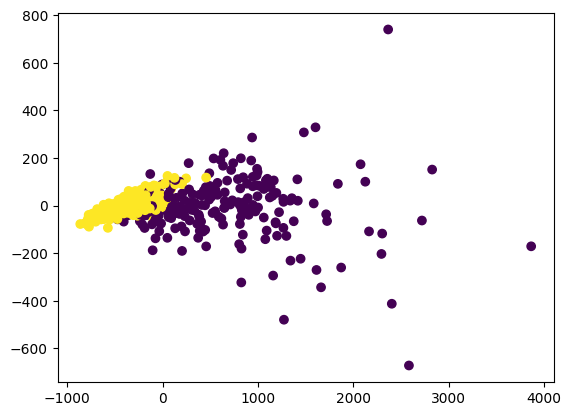

In [46]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer_data.target)
plt.show()

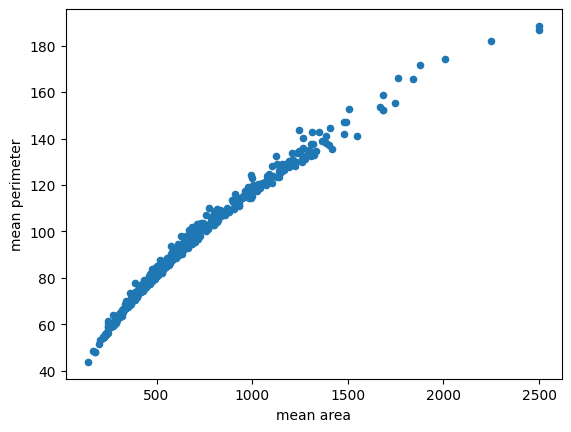

In [41]:
cancer_data.data.plot.scatter(x='mean area', y='mean perimeter')
plt.show()

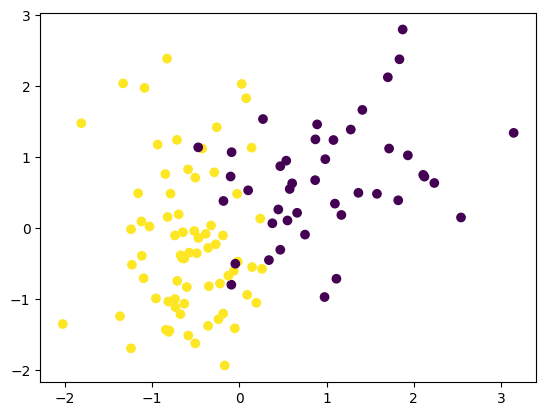

In [31]:
#plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test)
#plt.show()